### Wstęp do Uczenia Maszynowego 
##### Laboratorium 5

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### Zadanie 2
-----
Eksperyment symulacyjny. Wygenerujmy dane w następujący sposób. Niech $n = 200$, $p = 5$. Wektor $\beta_0 = 1$, $\beta_1 = [2, 1, 0.5, 0.01, 0]$, $x_i \sim N_p(0, I)$ dla $i = 1,2, \dots, n$. $y_i$ pochodzi z rozkładu $Bern(p_i)$, gdzie $p_i=\frac{exp(\beta_0 + x_{i\cdot}\beta_1)}{1 + exp(\beta_0 + x_{i\cdot}\beta_1)}$.

a) Dopasuj model regresji logistycznej. Porównaj prawdziwe wartości wektora $\beta$ z wyestymowanymi.

b) Dopasuj model regresji logistycznej z regularyzacją $L2$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

c) Dopasuj model regresji logistycznej z regularyzacją $L1$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

d) Powtórz eksperyment 500 razy dla modelu logistycznego bez regularyzacji, z regularyzacją $L2$ i parametrem $C=1$ i regularyzacją $L1$ i parametrem $C=1$. Oblicz MSE.

In [2]:
n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])
X = np.random.normal(0, 1, size = (n, p))
Xbeta = X@beta_1+beta_0
probs = np.exp(Xbeta)/(1+np.exp(Xbeta)) 
y = np.random.binomial(1, probs) 

In [3]:
# a)
lm = LogisticRegression(penalty = None)
lm.fit(X,y)
print(lm.coef_)
print(lm.intercept_)

[[ 2.43798035  1.02490577  0.58229129  0.19543791 -0.18275788]]
[1.3831635]


In [4]:
# b)
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    lm = LogisticRegression(penalty = 'l2', C = c)
    lm.fit(X, y)
    coefs.append(lm.coef_[0])
    intercepts.append(lm.intercept_[0])

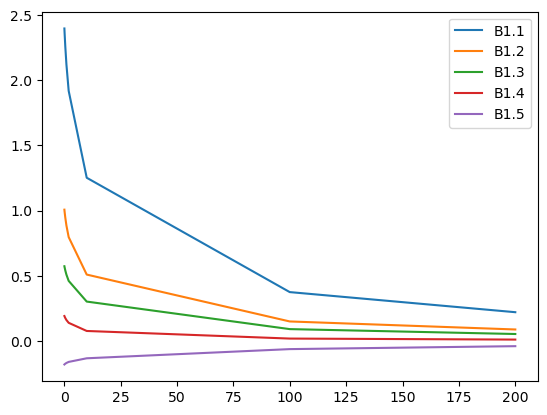

In [5]:
plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()

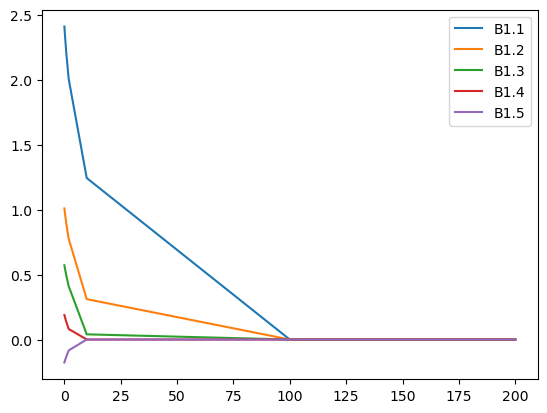

In [6]:
# c)
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    lm = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    lm.fit(X, y)
    coefs.append(lm.coef_[0])
    intercepts.append(lm.intercept_[0])

plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()


In [7]:
# d)
k = 500
n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])

MSE = []
MSE_l1 = []
MSE_l2 = []

for i in range(k):

  X = np.random.normal(0, 1, size = (n, p))
  Xbeta = X@beta_1+beta_0
  probs = np.exp(Xbeta)/(1+np.exp(Xbeta)) 
  y = np.random.binomial(1, probs)

  lm = LogisticRegression(penalty = None, max_iter = 100)
  lm.fit(X,y)

  MSE.append(np.sum((lm.coef_ - beta_1)**2 + (lm.intercept_ - beta_0)**2))

  lm_l1 = LogisticRegression(penalty = 'l1', max_iter = 100, solver = 'liblinear')
  lm_l1.fit(X,y)

  MSE_l1.append(np.sum((lm_l1.coef_ - beta_1)**2 + (lm_l1.intercept_ - beta_0)**2))

  lm_l2 = LogisticRegression(penalty = 'l2', max_iter = 100)
  lm_l2.fit(X,y)
  
  MSE_l2.append(np.sum((lm_l2.coef_ - beta_1)**2 + (lm_l2.intercept_ - beta_0)**2))

print('MSE:', np.round(np.mean(MSE), 5))
print('MSE l1:', np.round(np.mean(MSE_l1), 5))
print('MSE l2:', np.round(np.mean(MSE_l2), 5))


MSE: 0.63508
MSE l1: 0.46365
MSE l2: 0.44106


##### Laboratorium 6

In [8]:
# losowanie dwóch zmiennych z rozkładu standardowego normalnego
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25 + [1]*25)
# przesunięcie punktów o wektor [1, 1]
X[y == 1] += 1


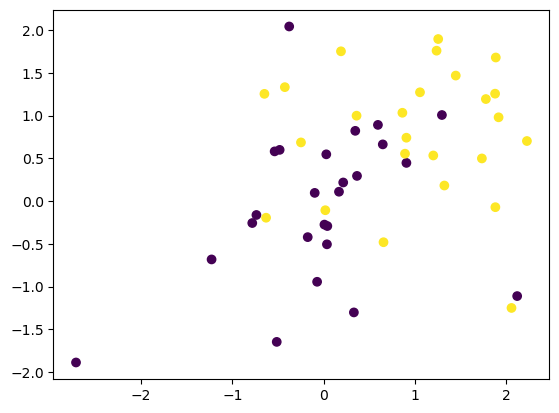

In [9]:
plt.scatter(X[:,0], X[:,1], c = y)

### Zadanie 1
-----
Zbuduj model wektorów podpierających wykorzystując zdefinowane X i y jak zbiór treningowy. Ustaw parametr `C` = 10, `kernel` = 'linear'.

In [10]:
from sklearn.svm import SVC
svm_linear = SVC(C = 10, kernel = 'linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

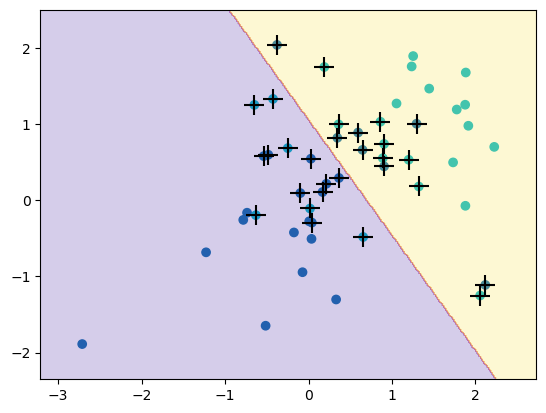

In [11]:
from ISLP.svm import plot as plot_svm

fig, ax = plt.subplots()
plot_svm(X, y, svm_linear, ax=ax)

## krzyżykiem są punkty support vectors
# mniejszy wartość parametru C - większa liczba wektorów podpierających

### Wyznaczanie hiperpłaszczyzny (dla dwóch wymiarów)

$<w, x> + b = 0$

$w_1x_1 + w_2x_2 + b = 0$

$w_2x_2 = -w_1x_1 - b$

$x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$


In [13]:
W = svm_linear.coef_[0]
b = svm_linear.intercept_[0]

A = -W[0]/W[1]
B = -b/W[1]

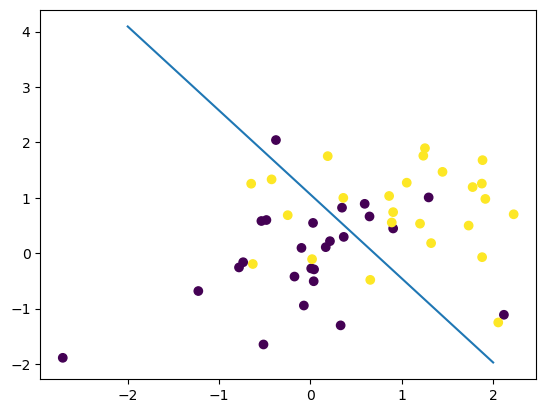

In [31]:
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c = y)
ax.plot(np.array([-2,2]), A * np.array([-2,2]) + B)


### Zadanie 2
-----
Wyznacz, które punkty są wektorami podpierającymi i zaznacz je na powyższym wykresie.

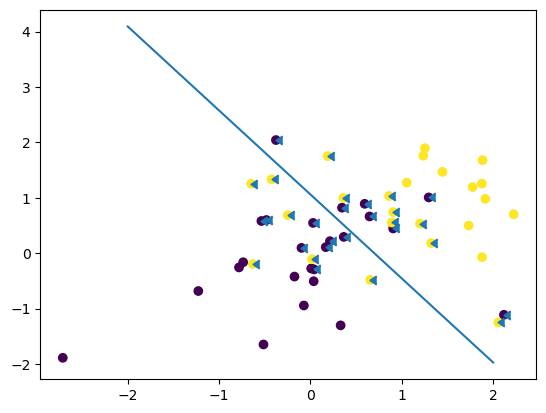

In [33]:
support = X[svm_linear.support_]
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c = y)
ax.plot(np.array([-2,2]), A * np.array([-2,2]) + B)
ax.scatter(support[:,0], support[:,1], marker = 4)

### Zadanie 3
-----
Zbuduj model wektorów podpierających wykorzystując zdefinowane X i y jak zbiór treningowy. Ustaw parametr `C` = 0.01, `kernel` = 'linear'. Narysuj płaszczyznę rozdzielającą klasy i wskaż wektory podpierające. 

In [71]:
from sklearn.svm import SVC
svm_linear_small = SVC(C = 0.01, kernel = 'linear')
svm_linear_small = svm_linear_small.fit(X, y)

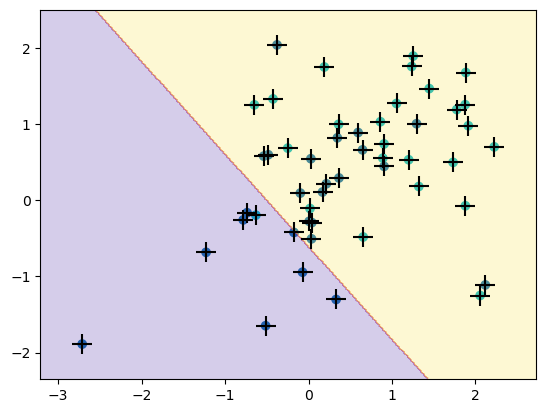

In [72]:
from ISLP.svm import plot as plot_svm

fig, ax = plt.subplots()
plot_svm(X, y, svm_linear_small, ax=ax)

In [34]:
W = svm_linear_small.coef_[0]
b = svm_linear_small.intercept_[0]

A = -W[0]/W[1]
B = -b/W[1]

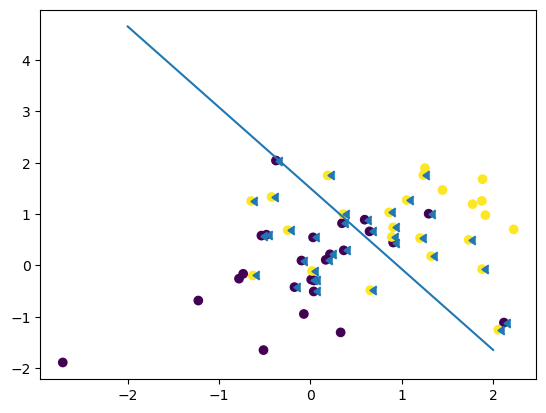

In [35]:
support = X[svm_linear_small.support_]
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c = y)
ax.plot(np.array([-2,2]), A * np.array([-2,2]) + B)
ax.scatter(support[:,0], support[:,1], marker = 4)

### Wyznaczanie marginesu (dla dwóch wymiarów)

$margin_{magnitude} = \frac{1}{||w||}$

$||w|| = \sqrt{w_1^2 + w_2^2}$

$\hat{w} = \frac{w}{||w||}$


In [37]:
w_hat = svm_linear.coef_[0] / (np.sqrt(np.sum(svm_linear.coef_[0] ** 2)))

In [38]:
margin = 1 / np.sqrt(np.sum(svm_linear.coef_[0] ** 2))

In [39]:
decision_boundary_points = np.array(list(zip(np.array([-3,3]), A * np.array([-3,3]) + B)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

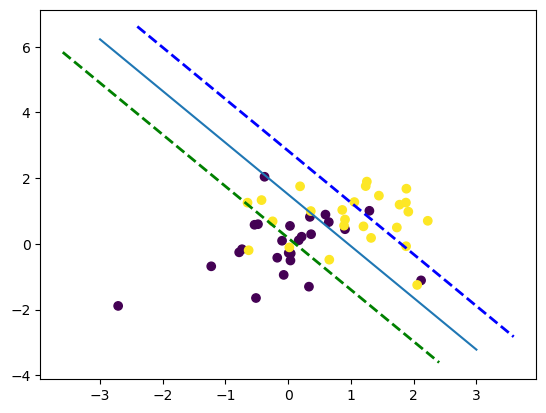

In [41]:
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c = y)
ax.plot(np.array([-3,3]), A * np.array([-3,3]) + B)
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

### Optymalizacja parametru C

In [42]:
import sklearn.model_selection as skm
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)

In [43]:
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}, 
                         refit=True,
                         cv=kfold,
                         scoring='accuracy')

In [44]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=10, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

In [45]:
grid.best_params_

{'C': 1}

In [46]:
grid.cv_results_

{'mean_fit_time': array([0.00091643, 0.00061727, 0.00121441, 0.00139303, 0.00116558,
        0.0009438 , 0.00082984]),
 'std_fit_time': array([0.00113702, 0.00082879, 0.00039848, 0.00101724, 0.0006918 ,
        0.00054365, 0.00122267]),
 'mean_score_time': array([0.00291858, 0.00060225, 0.00140834, 0.00105672, 0.00120049,
        0.00099607, 0.00020027]),
 'std_score_time': array([0.00445354, 0.00079767, 0.00050625, 0.00064361, 0.00074914,
        0.00088995, 0.00040054]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.3, 0.3, 0.8, 0.8, 0.8, 0.8, 0.8]),
 'split2_test_score': array([0.6, 0.6, 0.8, 0.9, 0.9, 0.9, 0.9]),
 'split3_test_score': array([0

In [47]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [54]:
grid.best_params_

{'C': 1}

In [64]:
grid.best_estimator_

SVC(C=1, kernel='linear')

Sprawdzenie modelu na zbiorze testowym

In [48]:
rng = np.random.default_rng(1)
X_test = rng.standard_normal((20,2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test == 1] += 1
#przesunięcie punktów z klasy 1 o 1,1 


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
best_ = grid.best_estimator_
y_pred_test = best_.predict(X_test)
confusion_matrix(y_pred_test, y_test)

array([[8, 1],
       [2, 9]], dtype=int64)

In [85]:
accuracy_score(y_test, y_pred_test)

0.85

In [86]:
y_pred_test_small = svm_linear_small.predict(X_test)
confusion_matrix(y_pred_test_small, y_test)

array([[3, 1],
       [7, 9]], dtype=int64)

In [87]:
accuracy_score(y_test, y_pred_test_small)

0.6